<a href="https://colab.research.google.com/github/jorge123aquino/Ejemplo-k-means/blob/main/Algoritmo_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo K means

In [27]:
#Importar las bibliotecas
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import time

In [16]:
# Generamos los datos aleatorios de juguetes
np.random.seed(123)
juguetes = np.random.randn(50, 2) * 1.5 + [0, 5]


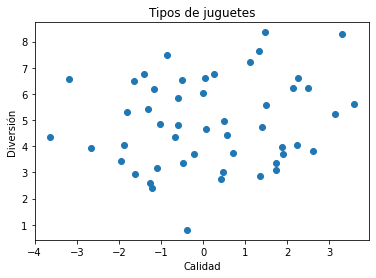

In [23]:
# Graficamos los juguetes
fig, ax = plt.subplots()
ax.scatter(juguetes[:,0], juguetes[:,1])
ax.set_title("Tipos de juguetes")
ax.set_xlabel("Calidad")
ax.set_ylabel("Diversión")
plt.show()

In [28]:
# Inicialización: Seleccionamos dos tipos de juguetes como centroides iniciales
k = 2
centroides = np.array([[1, 7], [-2, 2]])

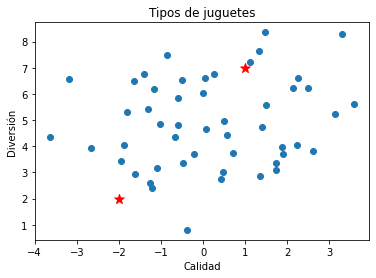

In [31]:
# Graficamos los juguetes
fig, ax = plt.subplots()
ax.scatter(juguetes[:,0], juguetes[:,1])
ax.scatter(centroides[:,0], centroides[:,1], color='r', marker='*', s=100 )
ax.set_title("Tipos de juguetes")
ax.set_xlabel("Calidad")
ax.set_ylabel("Diversión")
plt.show()

In [32]:
# Clasificación: Cada juguete se asigna al tipo de juguete más cercano
def asignar_tipos(juguetes, centroides):
    distancias = np.sqrt(((juguetes - centroides[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distancias, axis=0)

In [33]:
# Cálculo de centroides: Actualizamos los centroides como la media de todos los juguetes asignados a ellos
def actualizar_centroides(juguetes, tipos, k):
    centroides = np.zeros((k, 2))
    for i in range(k):
        centroides[i,:] = np.mean(juguetes[tipos==i], axis=0)
    return centroides

In [34]:
# Convergencia y animación 
def k_means_animation(juguetes, k=2, num_iteraciones=6):
    centroides = np.array([[1, 7], [-2, 2]])

    fig, ax = plt.subplots()
    ax.scatter(juguetes[:,0], juguetes[:,1])
    centroides_plot = ax.scatter(centroides[:,0], centroides[:,1], color='r', marker='*', s=100)
    ax.set_title("Grupos de juguetes")
    ax.set_xlabel("Calidad")
    ax.set_ylabel("Diversión")

    def update(i):
        global centroides
        tipos = asignar_tipos(juguetes, centroides)
        centroides_nuevos = actualizar_centroides(juguetes, tipos, k)
        ax.clear()
        ax.scatter(juguetes[:,0], juguetes[:,1], c=tipos)
        centroides_plot = ax.scatter(centroides[:,0], centroides[:,1], color='r', marker='*', s=100 + (i*10))
        ax.set_title("Grupos de juguetes - Iteración {}".format(i+1))
        ax.set_xlabel("Calidad")
        ax.set_ylabel("Diversión")
        print("Centroides en la iteración {}: {}".format(i+1, centroides))
        centroides = centroides_nuevos
        time.sleep(0.5)
        return ax

    ani = FuncAnimation(fig, update, frames=num_iteraciones, repeat=False)
    plt.close()
    return ani

# Mostramos la animación
ani = k_means_animation(juguetes)
ani.save('k_means_animation.gif', writer='pillow', fps=2)

Centroides en la iteración 1: [[ 1  7]
 [-2  2]]
Centroides en la iteración 1: [[ 0.65051278  5.76783853]
 [-0.72683994  3.21276746]]
Centroides en la iteración 2: [[ 0.75131322  5.89424177]
 [-0.67143769  3.40642325]]
Centroides en la iteración 3: [[ 0.87370537  5.94967345]
 [-0.69786852  3.56203916]]
Centroides en la iteración 4: [[ 1.08044259  6.03798675]
 [-0.71601688  3.76024198]]
Centroides en la iteración 5: [[ 1.08044259  6.03798675]
 [-0.71601688  3.76024198]]
Centroides en la iteración 6: [[ 1.08044259  6.03798675]
 [-0.71601688  3.76024198]]
